# **Ali Padyav - 810199388**
### **AI - CA4 - ML**

In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<div style="background-color:#54504F; color: white; padding: 20px; font-size:25px; width: 400px;">Inspecting</div>

In [2]:
df = pd.read_csv('diabetes.csv')

### Q1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


### Q2

In [5]:
def count_nulls(df):
    nulls_count = df.isnull().sum()
    nulls_count.name = 'nulls count'
    nulls = nulls_count.to_frame().transpose()

    nulls_percent = nulls.apply(lambda x: x / len(df) * 100)
    nulls_percent = nulls_percent.rename(index={'nulls count': 'nulls percentage'})

    nulls = pd.concat([nulls, nulls_percent], names=['s1', 's2'])
    nulls = nulls.sort_values(by=['nulls count'], axis=1, ascending=False)
    display(nulls)


count_nulls(df)


,DiabetesPedigreeFunction,SkinThickness,Pregnancies,Glucose,Age,BloodPressure,Insulin,BMI,Outcome
nulls count,178.000000,144.00,133.000000,114.00000,113.000000,88.000000,88.000000,84.0000,0.0
nulls percentage,23.177083,18.75,17.317708,14.84375,14.713542,11.458333,11.458333,10.9375,0.0


### Q3

<AxesSubplot: >

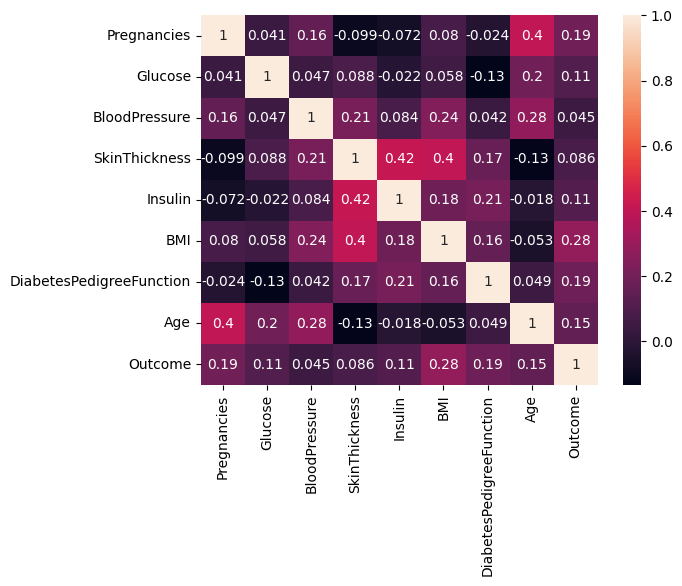

In [6]:
sns.heatmap(df.corr(), annot=True)

In [7]:
corr_features = df.corr()['Outcome'].sort_values(ascending=False)[1:]
display(corr_features)

BMI                         0.284374
Pregnancies                 0.193306
DiabetesPedigreeFunction    0.186958
Age                         0.152902
Insulin                     0.112239
Glucose                     0.105518
SkinThickness               0.086170
BloodPressure               0.044803
Name: Outcome, dtype: float64

<div dir="rtl">
از نتایج بالا مشخص است که target feature بیتشرین وابستگی را به 
Pregnancies, DiabetesPedigreeFunction و Age
دارد.
</div>

### Q4

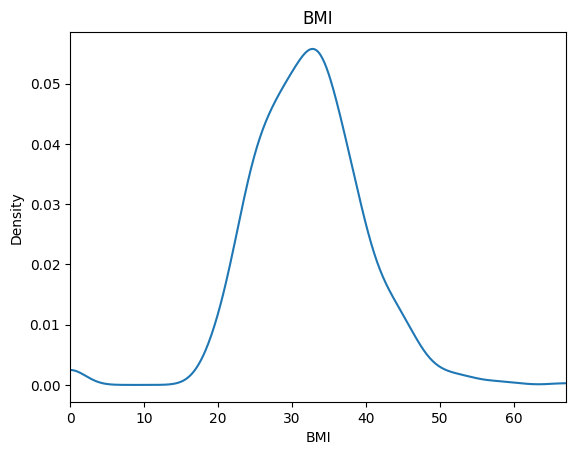

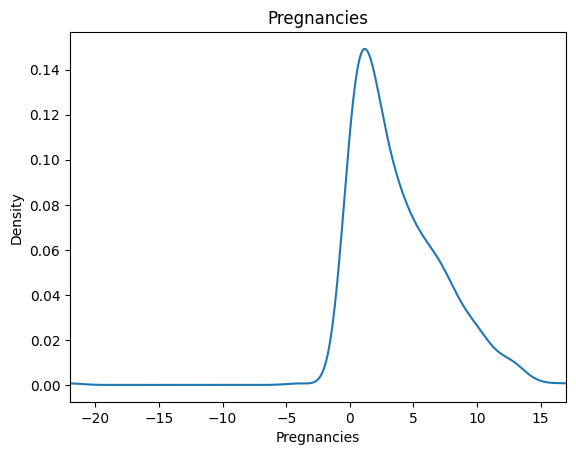

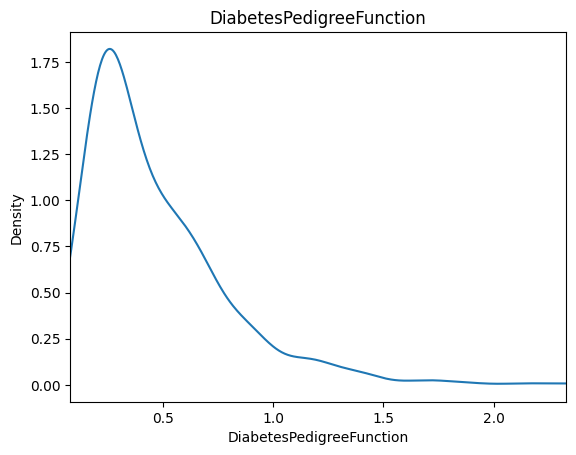

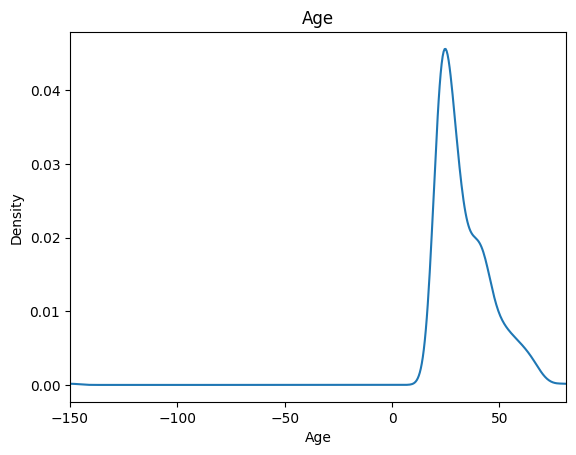

In [8]:
for feature in corr_features.index[:4]:
    data = df[feature]
    ticks = int(data.max() - data.min())

    plt.figure()
    plt.title(feature)
    data.plot.kde()
    plt.xlim(data.min(), data.max())
    plt.ylabel('Density')
    plt.xlabel(feature)
    plt.show()


### Q5

<div dir="rtl">
نمودار
scatter
به ازای مقادیر مختلف feature و outcome اگر موردی بود، آن را 1 و اگر نبود آن را 0 قرار میدهد.
ولی در hexbin تراکم داده ها نیز مشخص اند و هرچه تراکم داده‌ای با مقدار feature و outcome مشخص بیشتر باشد، رنگش پررنگ تر است.
</div>

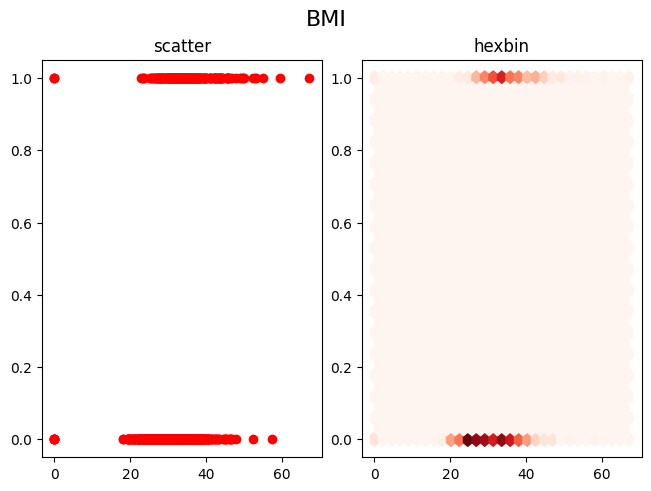

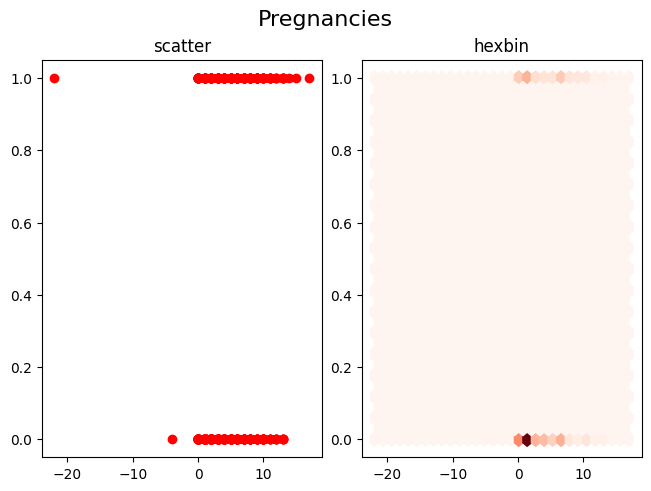

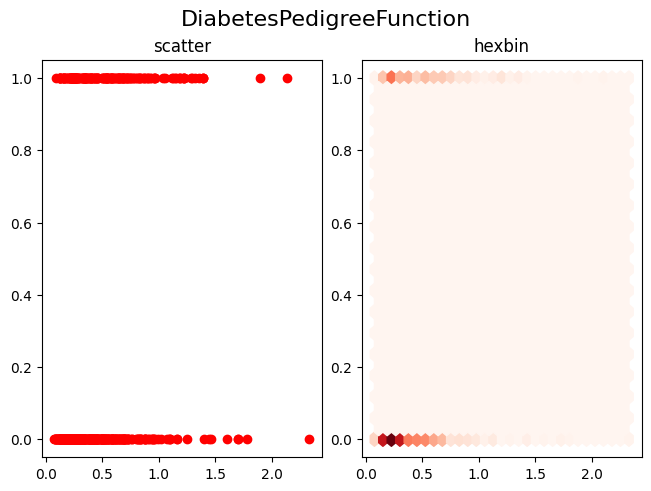

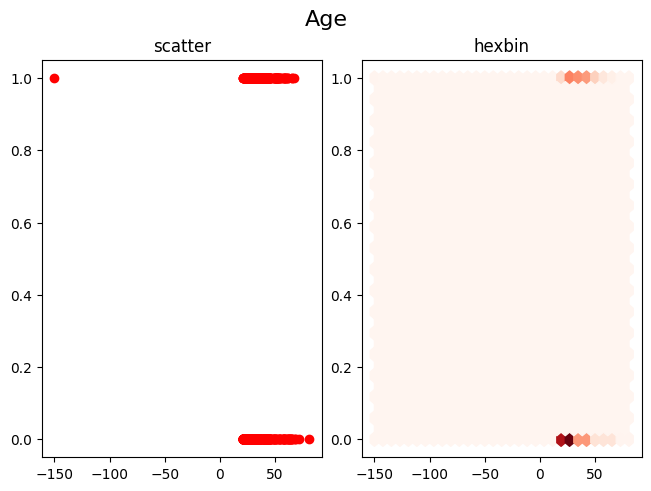

In [9]:
for feature in corr_features.index[:4]:
    fig, axs = plt.subplots(1, 2, constrained_layout=True)
    fig.suptitle(feature, fontsize=16)
    axs[0].set_title('scatter')
    axs[0].scatter(df[feature], df['Outcome'], c='red')
    axs[1].set_title('hexbin')
    axs[1].hexbin(df[feature], df['Outcome'], gridsize=30, cmap='Reds')
    plt.show()

<div style="background-color:#54504F; color: white; padding: 20px; font-size:25px; width: 400px;">Preproccessing</div>

<div dir="rtl">
از آنجایی که هیچکدام از
feature
های ما نمیتوانند مقدار منفی داشته باشند، به جای تمام مقادیر منفی 0 میگذاریم.
</div>

In [10]:
df[df < 0] = np.nan

<div dir="rtl">
همچنین سطح گلوکز در خون، فشار خون، ضخامت پوست، سطح انسولین در خون و BMI نمیتوانند 0 باشند. ممکن است به این دلیل 0 باشند که هنگام جمع آوری داده به جای خالی گذاشتن یک ویژگی، آن را با 0 پر کرده باشند.
</div>

In [11]:
for column in df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]:
    df[column].replace(0, np.nan, inplace=True)

### Q1

<div dir="rtl">
<ul>

<li>
حذف سطر: اگر تعداد
missing values
در یک ستون کم باشد یا اطلاعات زیادی از یک ستون از دست رفته باشد، میتوان سطرهای حاوی آن ها را حذف کرد.
</li>

<li>
پر کردن داده‌ها با توجه به class:
یعنی هنگام پر کردن مقادیر (با میانگین، مد و ...) فقط داده‌های همکلاس را بررسی میکنیم.
اینکار میتواند
bias را کاهش دهد.
</li>

<li>
پر کردن با میانگین:
برای داده‌هایی که گسسته اند یا اصلا عددی نیستند کاربرد ندارد، در غیر اینصورت تقریب خوبی برای داده از دست رفته است.
</li>

</ul>
</div>

### Q2

In [12]:
count_nulls(df)

,Insulin,SkinThickness,DiabetesPedigreeFunction,Pregnancies,BloodPressure,Glucose,Age,BMI,Outcome
nulls count,417.000000,330.00000,178.000000,135.000000,121.000000,119.000000,114.00000,93.000000,0.0
nulls percentage,54.296875,42.96875,23.177083,17.578125,15.755208,15.494792,14.84375,12.109375,0.0


In [13]:
df.fillna(df.median(), inplace=True)
df.drop(columns=['Insulin', 'SkinThickness'], inplace=True)
count_nulls(df)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
nulls count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nulls percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Q3

<div dir="rtl">
Normalizing
رنج داده ها را از 0 تا 1 میکند.
Standardaizing
مقادیر یک ویژگی را منهای میانگین و تقسیم بر انحراف معیار میکند. با اینکار میانگین 0 و انحراف معیار 1 میشود.

این 2 روش دیتارا تغییر میدهند ولی توزیعشان ثابت میماند. این تغییر مقیاس برای بعضی روش های مثل KNN که در آنها به دنبال محاسبه فاصله datapointها هستند نیاز است.
<br>
<br>
اگر در داده پرت داشته باشیم Normalizing
به خوبی عمل نمیکند. در طرف دیگر اگر داده های ما توزیع گوسی داشته باشند 
Standardizing
به خوبی عمل میکند.

ما در اینجا از Normalization استفاده میکنیم.
</div>

In [14]:
from sklearn.preprocessing import MinMaxScaler

needed_cols = df.columns.difference(('Outcome',))
df[needed_cols] = MinMaxScaler().fit_transform(df[needed_cols])

### Q4

<div dir="rtl">

<ul>

<li>
Label Encoding:
به هر دسته خاص عددی نسبت میدهیم.
</li>

<li>
Frequency Encoding:
به جای هر دسته فرکانسش را قرار میدهیم.
</li>

<li>
One-Hot Encoding:
به ازای هر مقدار ممکن یک ویژگی، یک ستون به ویژگی ها اضافه میکنیم و اگر دیتای ما آن ویژگی را داشت 1 و در غیر اینصورت 0 میگذاریم. اگر مقادیر ممکن برای ویژگی ما زیاد باشند، این انکودینگ مناسب نیست.
</li>

<li>
Target Encoding:
برای هر دسته، میانگین متغیر هدف در آن دسته را قرار میدهیم.
</li>

</ul>

اگر دسته داده های ما در اصل عددی باشند و فقط در قالب string ثبت شده باشند، کافیست آنها را به عدد تبدیل کنیم.
مثلا کلاس دانش آموزان (اول، دوم و ...)


<b>دیتای ما ویزگی categorical ندارد. بنابراین لازم نیست کاری انجام دهیم.</b>
</div>

### Q5

<div dir="rtl">
در کل ستون‌هایی که ستون‍‌های دیگر correlation زیادی دارند یا correlationشان با متغیر هدف کم هست یا تعداد missing valuesشان زیاد است را میتوان حذف کرد.
به دلیل تعداد زیاد 
missing values ویژگی
<b>Insulin</b>
و
<b>SkinThickness</b>
را حذف می‌کنیم.
</div>

### Q6

<div dir="rtl">
به طور معمول 75% داده‌ها را به train و باقی را به test اختصاص میدهیم.
<br>
<br>
می‌توان اینکار را رندوم انجام داد یا داده‌ها را به n دسته تقسیم کرد و در n مرحله n-1 دسته را برای train و 1 دسته را برای test انتخاب کنیم. اینکار باعث کاهش bias میشود.
</div>

In [15]:
from sklearn.model_selection import train_test_split
from dataclasses import dataclass

class DataSplitter:
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test


x_data = df.drop(columns=['Outcome'])
y_data = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.75, random_state=1)
splitted = DataSplitter(x_train, x_test, y_train, y_test)

### Q7

<div dir="rtl">
اگر فاز validation را نداشته باشیم ممکن است مدل ما با train overfit شود و کارایی خود را روی test از دست دهد. اما با validation میتوانیم hyperparameter های مدلمان را tune کنیم.
برای همین یک دسته دیتای validation میگذاریم تا قبل از کار بر روی test data هایپرپارامترهای ما tune شوند.

</div>

<div style="background-color:#54504F; color: white; padding: 20px; font-size:25px; width: 400px;">Train, Evaluate, Adjust</div>

In [16]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### Q1

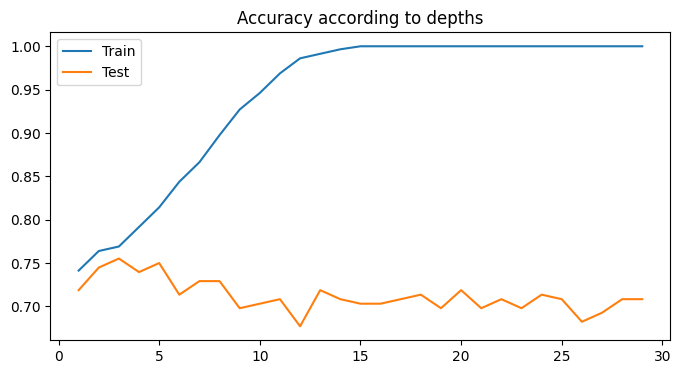

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = range(1, 30)

train_predicts = []
test_predicts = []

for i in depths:
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(splitted.x_train,splitted.y_train)

    train_predict = dtree.predict(splitted.x_train)
    train_predicts.append(accuracy_score(splitted.y_train, train_predict))

    test_predict = dtree.predict(splitted.x_test)
    test_predicts.append(accuracy_score(splitted.y_test, test_predict))

plt.figure(figsize=(8, 4))
plt.plot(depths, train_predicts, label='Train')
plt.plot(depths, test_predicts, label='Test')
plt.legend()
plt.title('Accuracy according to depths')
plt.show()


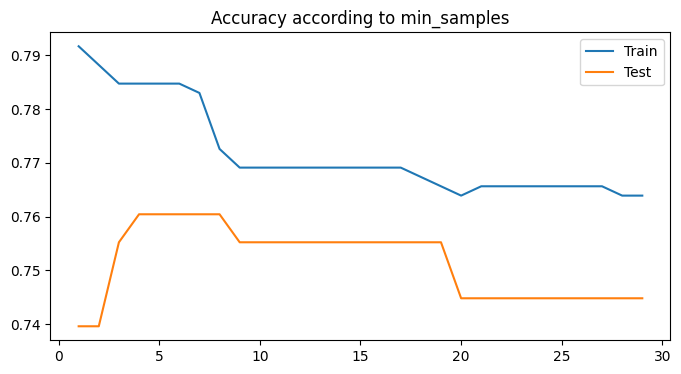

In [18]:
leaves = range(1, 30)

test = []
train = []

for i in leaves:
    dtree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=i)
    dtree.fit(splitted.x_train,splitted.y_train)

    train_pred= dtree.predict(splitted.x_train)
    train.append(accuracy_score(splitted.y_train, train_pred))

    test_pred = dtree.predict(splitted.x_test)
    test.append(accuracy_score(splitted.y_test, test_pred))

plt.figure(figsize=(8, 4))
plt.plot(depths, train, label='Train')
plt.plot(depths, test, label='Test')
plt.legend()
plt.title('Accuracy according to min_samples')
plt.show()

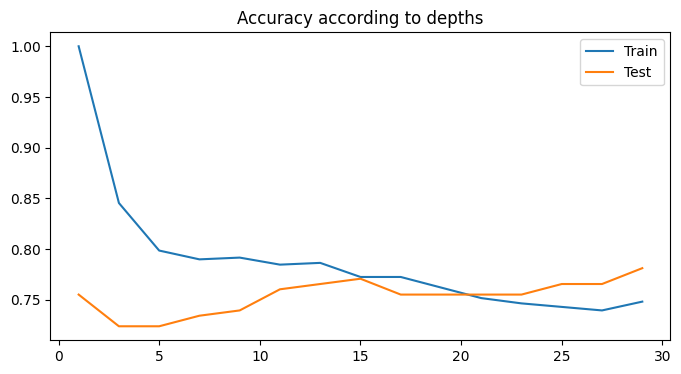

In [19]:
n_neighbors = range(1, 30, 2)

train_predicts = []
test_predicts = []

for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=i, p=2)
    knn.fit(splitted.x_train,splitted.y_train)

    train_predict = knn.predict(splitted.x_train)
    train_predicts.append(accuracy_score(splitted.y_train, train_predict))

    test_predict = knn.predict(splitted.x_test)
    test_predicts.append(accuracy_score(splitted.y_test, test_predict))

plt.figure(figsize=(8, 4))
plt.plot(n_neighbors, train_predicts, label='Train')
plt.plot(n_neighbors, test_predicts, label='Test')
plt.legend()
plt.title('Accuracy according to depths')
plt.show()

In [39]:
from sklearn.base import ClassifierMixin

def predict(model: ClassifierMixin):
    model.fit(splitted.x_train, splitted.y_train)
    predicted = model.predict(splitted.x_test)
    test_accuracy = metrics.accuracy_score(splitted.y_test, predicted)
    return predicted, test_accuracy

In [21]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=8)
dtree_predict, dtree_test_acc= predict(dtree)
print(f'Decision Tree Test Accuracy: {dtree_test_acc*100:.2f}%')

knn = KNeighborsClassifier(n_neighbors=15, p=2)
knn_predict, knn_test_acc = predict(knn)
print(f'K Nearest Neighbors Test Accuracy: {knn_test_acc*100:.2f}%')

logreg = LogisticRegression(random_state=1)
logreg_predict, logreg_test_acc = predict(logreg)
print(f'Logistic Regression Test Accuracy: {logreg_test_acc*100:.2f}%')

Decision Tree Test Accuracy: 76.56%
K Nearest Neighbors Test Accuracy: 77.08%
Logistic Regression Test Accuracy: 76.04%


$$ Accuracy = \frac{TP + TN}{AllPredictions} $$
$$ Precision = \frac{TP}{TP + FP} $$
$$ Recall = \frac{TP}{TP + FN} $$

<div dir="rtl">
Accuracy نسبت پیشبینی های درست ما به کل پیشبنی‌هاست
<br>
Precision نسبت پشیبینی‌های مثبت درست ما به پیشبنی‌ای مثبت ماست
<br>
Recall نسبت پیشبینی‌های مثبت درست ما نسبت به داده‌های مثبت است
<br>
<br>
حالا accuracy را برای هر یک از مدل ها با فرمول بالا محاسبه میکنیم و میبینیم که دقت به دست آمده با نتایج بالا برابر است.
</div>

In [56]:
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(predict, model_name):
    matrix = confusion_matrix(splitted.y_test , predict)
    sns.heatmap(matrix, annot=True, fmt=".1f", square = True)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(model_name)
    plt.show()

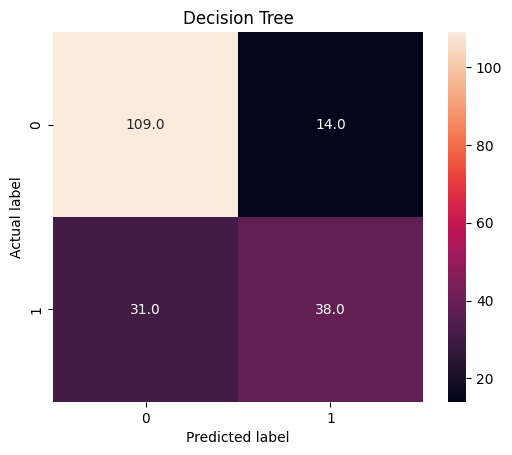

In [57]:
plot_conf_matrix(dtree_predict, 'Decision Tree')

$ Accuracy = \frac{38 + 109}{192} = 0.765 $

$ Precision = \frac{38}{38 + 14} = 0.730 $

$ Recall = \frac{38}{38 + 31} = 0.550 $

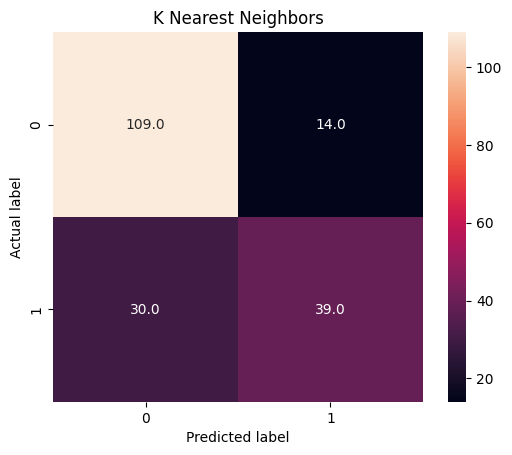

In [58]:
plot_conf_matrix(knn_predict, 'K Nearest Neighbors')

$ Accuracy = \frac{39 + 109}{192} = 0.770 $

$ Precision = \frac{39}{39 + 14} = 0.735 $

$ Recall = \frac{39}{39 + 30} = 0.565 $

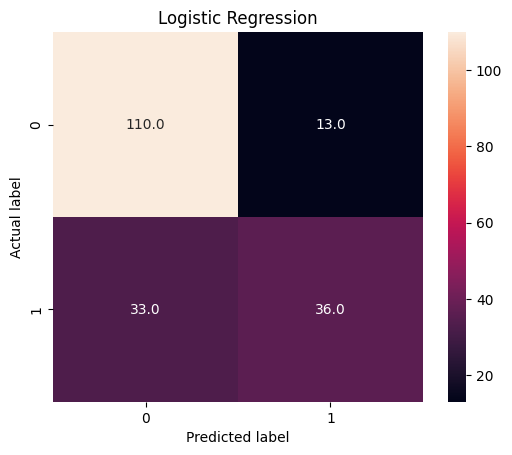

In [59]:
plot_conf_matrix(logreg_predict, 'Logistic Regression')

$ Accuracy = \frac{36 + 109}{192} = 0.755 $

$ Precision = \frac{36}{36 + 13} = 0.734 $

$ Recall = \frac{36}{36 + 33} = 0.521 $

### Q2

In [26]:
from sklearn.model_selection import GridSearchCV

search_params = {
    'criterion': ['entropy'],
    'max_depth': range(1, 30),
    'min_samples_leaf': range(1, 30),
    'random_state': [1]
}

grid = GridSearchCV(dtree, search_params, scoring='accuracy', n_jobs=2)
grid_dtree_predict, grid_dtree_test_acc= predict(grid)
print(f'Grid Decision Tree Test Accuracy: {grid_dtree_test_acc*100:.2f}%')
print(grid.best_params_)

Grid Decision Tree Test Accuracy: 78.65%
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 26, 'random_state': 1}


In [27]:
search_params = {
    'n_neighbors': range(1, 30, 2)
}

grid = GridSearchCV(knn, search_params, scoring='accuracy', n_jobs=2)
grid_knn_predict, grid_knn_test_acc= predict(grid)
print(f'Grid K Nearest Neighbors Test Accuracy: {grid_knn_test_acc*100:.2f}%')
print(grid.best_params_)

Grid K Nearest Neighbors Test Accuracy: 76.56%
{'n_neighbors': 27}


### Q3

<div dir="rtl">
<ul>
<li>
Uderfitting:
اگر مدل ما روی داده train خوب عمل نکند، underfitting رخ داده. یعنی مدل پیچیدگی لازم را برای جزئیات داده ندارد و به نوعی high biased است.
</li>

<li>
Overfitting:
یعنی مدل ما روی داده train به خوبی عمل میکند و bias اش کم است. اما روی داده test عملکرد خوبی ندارد و varianceاش کم است.این اتفاق میتواند به دلیل پیچیدگی بیش از حد مدل باشد که حتی نویزها و جزئیات غیرضروری را یادگیری کرده است.
</li>
</ul>

در این پروژه به 2 شکل سعی در جلوگیری از این کار شده است. یکی تست کردن هایپرپارامترهای مختلف و نمایش دقت مدل روی داده train و test و نمایش نتایج روی نمودار. سپس تصمیم گیری برای مقدار مناسب پارامتر.
یکی دیگر هم استفاده از GridSearchCV
که به صورت خودکار مقدار مناسب هایپرپارامترها را پیدا میکند تا مدل ما overfit یا underfit نشود.

</div>

### Q4

<div dir="rtl">
در بخش Preproccessing کارهایی که به نظرم نیاز بود را انجام دادم.
و بدون انجام دادن این از قطعا دقت مدل ما کمتر از الان می‌بود.
</div>

<div style="background-color:#54504F; color: white; padding: 20px; font-size:25px; width: 400px;">Ensembling</div>

In [28]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=100, random_state=1)
rforest_predict, rforest_test_acc = predict(rforest)
print(f'Random Forest Test Accuracy: {rforest_test_acc*100:.2f}%')

Random Forest Test Accuracy: 77.08%


In [60]:
search_params = {
            'n_estimators': range(1, 50, 5),
            'criterion': ['entropy'],
            'max_depth': range(1, 20),
            'random_state': [1]
        }

grid = GridSearchCV(rforest, search_params, scoring='accuracy', n_jobs=2)
grid_rforest_predict, grid_rforest_test_acc= predict(grid)
print(f'Grid Random Forest Test Accuracy: {grid_rforest_test_acc*100:.2f}%')
print(grid.best_params_)

Grid Random Forest Test Accuracy: 77.08%
{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 46, 'random_state': 1}


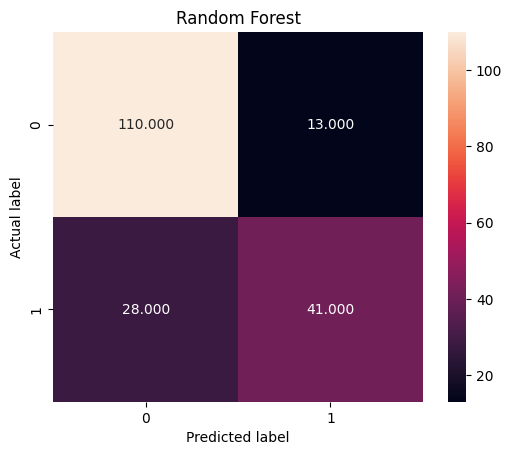

In [30]:
plot_conf_matrix(grid_rforest_predict, 'Random Forest')

$ Accuracy = \frac{41 + 110}{192} = 0.786 $

$ Precision = \frac{41}{41 + 13} = 0.759 $

$ Recall = \frac{41}{41 + 28} = 0.594 $

### Q1

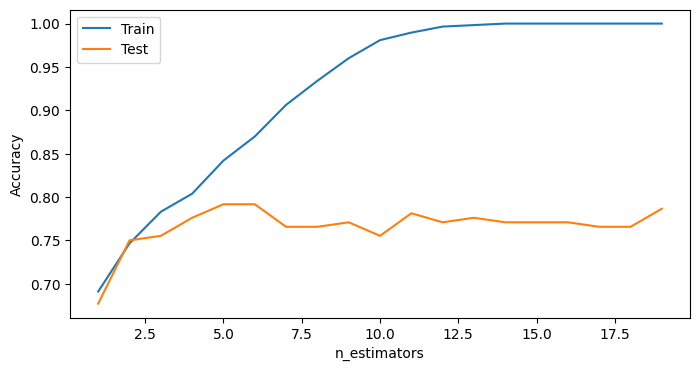

In [36]:
max_depths = range(1, 20)

train_predicts = []
test_predicts = []

for depths in max_depths:
    rforest = RandomForestClassifier(max_depth=depths)
    rforest.fit(splitted.x_train,splitted.y_train)

    train_predict = rforest.predict(splitted.x_train)
    train_predicts.append(accuracy_score(splitted.y_train, train_predict))

    test_predict = rforest.predict(splitted.x_test)
    test_predicts.append(accuracy_score(splitted.y_test, test_predict))

plt.figure(figsize=(8, 4))
plt.plot(max_depths, train_predicts, label='Train')
plt.plot(max_depths, test_predicts, label='Test')
plt.legend()
plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.show()

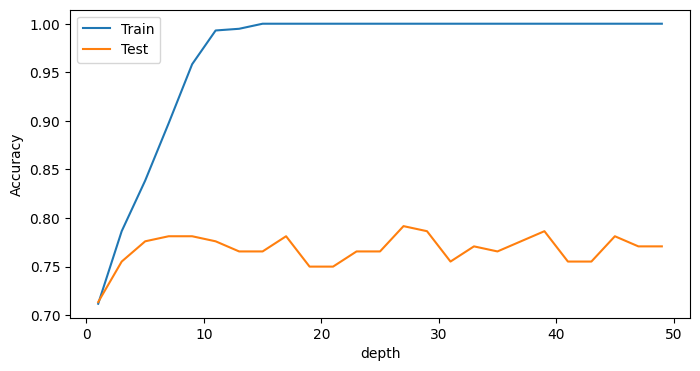

In [34]:
n_estimators = range(1, 50, 2)

train_predicts = []
test_predicts = []

for count in n_estimators:
    rforest = RandomForestClassifier(max_depth=count)
    rforest.fit(splitted.x_train,splitted.y_train)

    train_predict = rforest.predict(splitted.x_train)
    train_predicts.append(accuracy_score(splitted.y_train, train_predict))

    test_predict = rforest.predict(splitted.x_test)
    test_predicts.append(accuracy_score(splitted.y_test, test_predict))

plt.figure(figsize=(8, 4))
plt.plot(n_estimators, train_predicts, label='Train')
plt.plot(n_estimators, test_predicts, label='Test')
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

<div dir="rtl">
<ul>
<li>
n_estimators
تعداد درختان در random forest را نشان میدهد. هر چه تعداد بیشتر باشد، مدل ما عملکرد بهتری خواهد داشت ولی از آنطرف به پردازش قوی تری نیز نیاز خواهیم داشت.
</li>
<li>
max depth حداکثر ارتفاع هر درخت در random forest را نشان میدهد. اگر این شاخص کم باشد، موجب underfit و اگر زیاد باشد، میتواند موجب overfit شود.
</li>
</ul>
</div>

### Q2

<div dir="rtl">
به طور معمول درخت تصمیم چون نویزها را هم یادگیری میکند، اگر پیچیدگی کافی را داشته باشد، bias کم و variance کمتری دارد.
از آنطرف random forest حالتی از bagging است که برای کاهش variance و overfit انجام میشود. با این تفاوت که در هر sample همه feature ها استفاده نمیشوند. همین امر به کاهش احتمال overfit می‌انجامد.

بنابراین انتظار میرود که desicion tree bias بیشتر و random forest variance کمتری داشته باشد.
</div>

In [51]:
from mlxtend.evaluate import bias_variance_decomp

dtree_expected, dtree_bias, dtree_var = bias_variance_decomp(dtree, splitted.x_train.values, splitted.y_train.values,
                                                splitted.x_test.values, splitted.y_test.values, loss='mse', random_seed=123)
rforest_expected, rforest_bias, rforest_var = bias_variance_decomp(rforest, splitted.x_train.values, splitted.y_train.values,
                                                splitted.x_test.values, splitted.y_test.values, loss='mse', random_seed=123)

print(f'Decision Tree bias: {dtree_bias:.4f} and variance: {dtree_var:.4f}')
print(f'Random Forest bias: {rforest_bias:.4f} and variance: {rforest_var:.4f}')


Decision Tree Bias: 0.1600 and Variance: 0.1128
Random Forest Bias: 0.1744 and Variance: 0.0673


<div dir="rtl">
واضح است که نتایج با انتظارات مطابقت دارد.
</div>